# Markov Decision Processes

In [1]:
using Interact
include("gridworld.jl")
include("helpers.jl")
g = DMUGridWorld()
value = Reactive.value; # to avoid ambiguity errors

In the grid world problem we have a $10 \times 10$ grid. Each cell in the grid represents a state in an MDP. The available actions are up, down, left, and right. The effects of these actions are stochastic. We move one step in the specified direction with probability 0.7, and we move one step in one of the three other directions, each with probability 0.1. If we bump against the outer border of the grid, we do not move at all.

We receive a cost of 1 for bumping against the outer border of the grid. There are four cells in which we receive rewards upon entering:
* $(8,9)$ has a reward of $+10$
* $(3,8)$ has a reward of $+3$
* $(5,4)$ has a reward of $-5$
* $(8,4)$ has a reward of $-10$

The coordinates are specified using the matrix convention in which the first coordinate is the row starting from the top and the second coordinate is the column starting from the left. The cells with rewards of $+10$ and $+3$ are absorbing states where no additional reward is ever received from that point onward.

Compute the maximum immediate reward for each state and plot. 

Interact.Options{:ToggleButtons,Symbol}(1: "input" = left Symbol , "a", :left, "left", 0, Interact.OptionDict(DataStructures.OrderedDict("left"=>:left,"right"=>:right,"up"=>:up,"down"=>:down), Dict(:left=>"left",:right=>"right",:up=>"up",:down=>"down")), Any[], Any[], true, "horizontal")

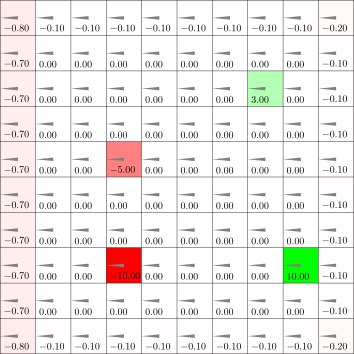

In [2]:
@manipulate for a in actions(g)
    policy = s -> a
    plot(g, s -> reward(g, s, a), policy)
end

## Policy Evaluation

$U^\pi_k(s) = R(s, \pi(s)) + \gamma \sum_{s'} T(s' \mid s, \pi(s))U^\pi_{k-1}(s')$

In [3]:
function iterativePolicyEvaluation(mdp::MDP, policy::Function, numIterations::Integer)
    (S, A, T, R, discount) = locals(mdp)
    U = zeros(Float64, length(S))
    for t = 1:numIterations
        U = map(s0 -> R(s0, policy(s0)) + discount*sum(s1 -> (T(s0, policy(s0), s1)*U[s1]), S), S)
    end
    U
end;

Interact.Options{:SelectionSlider,Int64}(5: "input-2" = 6 Int64 , "numIterations", 6, "6", 7, Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict(2=>"2",11=>"11",0=>"0",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3"…)), Any[], Any[], true, "horizontal")

Interact.Options{:ToggleButtons,Symbol}(7: "input-3" = left Symbol , "a", :left, "left", 0, Interact.OptionDict(DataStructures.OrderedDict("left"=>:left,"right"=>:right,"up"=>:up,"down"=>:down), Dict(:left=>"left",:right=>"right",:up=>"up",:down=>"down")), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(9: "input-4" = 0.5 Float64 , "discount", 0.5, "0.5", 5, Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9), Dict(0.4=>"0.4",0.7=>"0.7",0.3=>"0.3",0.5=>"0.5",0.2=>"0.2",0.9=>"0.9",0.1=>"0.1",0.8=>"0.8",0.6=>"0.6")), Any[], Any[], true, "horizontal")

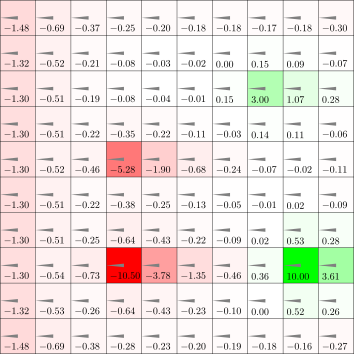

In [4]:
@manipulate for numIterations = 0:12, a = actions(g), discount = 0.1:0.1:0.9
    policy = s -> a
    g.discount = discount
    U = iterativePolicyEvaluation(g, policy, numIterations)
    plot(g, U, policy)
end

## Value Iteration

$U^*_k(s) = \max_a\left[R(s, a) + \gamma \sum_{s'} T(s' \mid s, a)U^*_{k-1}(s')\right]$  
$\pi^*(s) = \arg\max_a\left[R(s, a) + \gamma \sum_{s'} T(s' \mid s, a)U^*(s')\right]$  

In [5]:
function valueIteration(mdp::MDP, numIterations::Integer; discount = 0.9)
    (S, A, T, R) = locals(mdp)
    U = zeros(Float64, length(S))
    for t = 1:numIterations
        Q(s0, a) = R(s0, a) + discount*sum(s1 ->T(s0, a, s1)*U[s1], S)
        U = [maximum(a->Q(s0,a), A) for s0 in S]
    end
    U
end
function extractPolicy(mdp::MDP, U::Vector)
    (S, A, T, R, discount) = locals(mdp)    
    Q(s0, a) = R(s0, a) + discount*sum(s1->T(s0, a, s1)*U[s1], S)
    [A[indmax([Q(s0,a) for a in A])] for s0 in S]
end;

Interact.Options{:SelectionSlider,Int64}(13: "input-5" = 5 Int64 , "numIterations", 5, "5", 6, Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict(2=>"2",0=>"0",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(15: "input-6" = 0.5 Float64 , "discount", 0.5, "0.5", 5, Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9), Dict(0.4=>"0.4",0.7=>"0.7",0.3=>"0.3",0.5=>"0.5",0.2=>"0.2",0.9=>"0.9",0.1=>"0.1",0.8=>"0.8",0.6=>"0.6")), Any[], Any[], true, "horizontal")

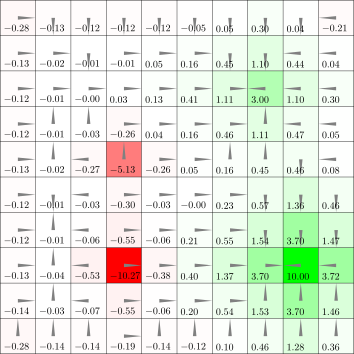

In [6]:
@manipulate for numIterations in 0:10, discount in 0.1:0.1:0.9
    U = valueIteration(g, numIterations, discount = discount)
    policy = extractPolicy(g, U)
    plot(g, U, policy)
end

## Gauss-Seidel Value Iteration

$U^*(s) \gets \max_a\left[R(s, a) + \gamma \sum_{s'} T(s' \mid s, a)U^*(s')\right]$  


In [7]:
function valueIterationGaussSeidel(mdp::MDP, numIterations::Integer)
    (S, A, T, R, discount) = locals(mdp)
    U = zeros(Float64, length(S))
    for t = 1:numIterations
        for s0 in S
            Q(s0, a) = R(s0, a) + discount*sum(s1 -> T(s0, a, s1)*U[s1], S)
            U[s0] = maximum(a->Q(s0,a), A)
        end
    end
    U
end;

Interact.Options{:SelectionSlider,Int64}(19: "input-7" = 5 Int64 , "numIterations", 5, "5", 6, Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict(2=>"2",0=>"0",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(21: "input-8" = 0.5 Float64 , "discount", 0.5, "0.5", 5, Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9), Dict(0.4=>"0.4",0.7=>"0.7",0.3=>"0.3",0.5=>"0.5",0.2=>"0.2",0.9=>"0.9",0.1=>"0.1",0.8=>"0.8",0.6=>"0.6")), Any[], Any[], true, "horizontal")

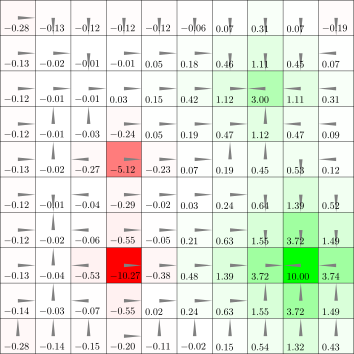

In [8]:
@manipulate for numIterations in 0:10, discount in 0.1:0.1:0.9
    U = valueIterationGaussSeidel(g, numIterations)
    policy = extractPolicy(g, U)
    plot(g, U, policy)
end